# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report we will be analysing TMDb Movie Dataset, we are specifically intersted in
> what properties affects the popularity of the movie, which genre to be specific was trendinng
> and popular. We will also explore what properties affects the revenue, and to what extent.

### Questtions to be explored
> 1. Which genres are most popular from year to year?

> 2. What kinds of properties are associated with movies that have high revenues?
  - Popularity
  - Voting
  - budget
  - genre
  - Months
  - runtime


## Importing Libraries

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#Reading Data
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
#checking the shape of the data frame
df.shape

(10866, 21)

In [4]:
# Checking Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning Columns that's not affecting our investigation

> we will be using the **adjacent Revenue & adjacent Budjet** in our investigation
> They represent the revenue and budget with money inflation factor added

In [5]:
df_red = df.drop(['production_companies','cast','homepage','tagline','overview','budget','revenue','imdb_id','id','keywords'], axis=1)

In [6]:
df_red.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##### Checking data types

In [7]:
#checking new info
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   original_title  10866 non-null  object 
 2   director        10822 non-null  object 
 3   runtime         10866 non-null  int64  
 4   genres          10843 non-null  object 
 5   release_date    10866 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


##### Checking null values and dropping rows

In [8]:
df_red.isnull().sum()

popularity         0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [9]:
df_red.dropna(inplace=True)
df_red.isnull().sum()

popularity        0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

###### Our Data is finally Clean
====================================

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Which genres are most popular?

#### Splitting Genre values

In [10]:
# Selecting rows with |
df_genreMix = df_red[df_red['genres'].str.contains('|')]
df_genreMix.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Helper function for lambda operation

In [11]:
# Function for splitting and returning either value or nan
def genre(x,index):
    try:
        x.split("|")[index]
        return x.split("|")[index]
    except IndexError:
#       returning nan for easily droping that row
        return float('NaN')
 

splitting genres column and duplicating rows

In [12]:
   
# Maximum 5 genres per Movie
df1 = df_genreMix.copy()
df1['genres'] = df1['genres'].apply(lambda x: genre(x,0))

df2 = df_genreMix.copy()
df2['genres'] = df2['genres'].apply(lambda x: genre(x,1))

df3 = df_genreMix.copy()
df3['genres'] = df3['genres'].apply(lambda x: genre(x,2))

df4 = df_genreMix.copy()
df4['genres'] = df4['genres'].apply(lambda x: genre(x,3))

df5 = df_genreMix.copy()
df5['genres'] = df5['genres'].apply(lambda x: genre(x,4))

appendinf DFs and dropping NaN genre rows

In [13]:
new_rows = df1.append(df2).append(df3).append(df4).append(df5)
new_rows.dropna(inplace=True)

In [14]:
# Dropping Df with mixed genres
df_red.drop(df_genreMix.index, inplace=True)
df_red.shape

(0, 11)

> It appears that all rows that have genre were having ore than one genre

In [15]:
df_red = df_red.append(new_rows, ignore_index=True)
df_red.shape

(26869, 11)

#### Comparing data

##### GENRAL GENRE POPULARITY  Historically

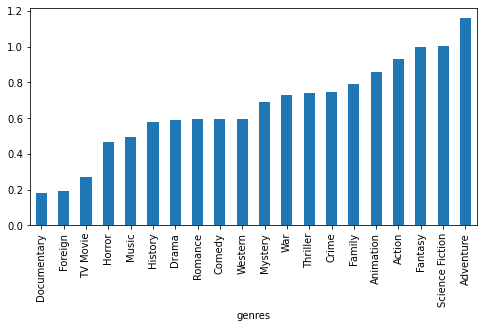

In [16]:

Genres_popularity = df_red.groupby('genres').popularity.mean().sort_values()
Genres_popularity.plot(kind='bar',figsize=(8,4));

> Adventure, Science Fiction, Fantasy, Action & Animation, are the most popular historically

##### Popularity Mean Across Years

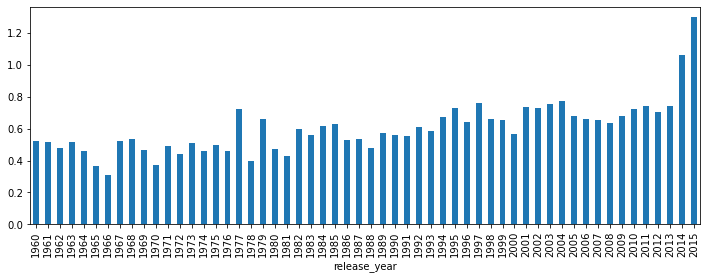

In [17]:
Popularity_across_years = df_red.groupby('release_year').popularity.mean()
Popularity_across_years.plot(kind='bar',figsize=(12,4));

> It appears that popularity over all for movies are flactuating every year, but increasing on the long run

#### Relationship between Popularity and Vote Counts

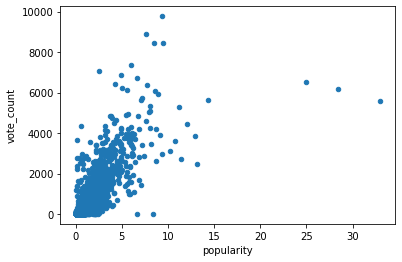

In [18]:
df_genreMix.plot(x='popularity', y='vote_count', kind='scatter');

#### Relationship between Popularity and Vote Average

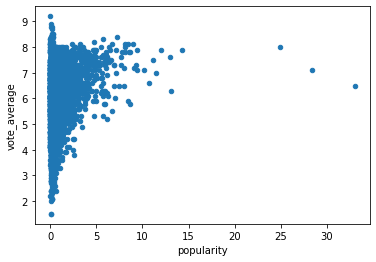

In [19]:
df_genreMix.plot(x='popularity', y='vote_average', kind='scatter');

> this Shows that vote Count Affects popularity more than the Vote Average its self

### Most Popular Genre Each Year

In [20]:
#Array for years
years = df_red.release_year.unique()
#Array for storing popular genre per year
topPopularGenre = []
topMeanPopulairty = []
for year in years:
    top = df_red[df_red.release_year == year].groupby('genres').popularity.mean().idxmax()
    topPopularity = df_red[df_red.release_year == year].groupby('genres').popularity.mean().max()
    topPopularGenre.append(top)
    topMeanPopulairty.append(topPopularity)

In [21]:
# ALTERNATIVE WAY
# dfByGenreYear = df_red.groupby(['release_year','genres']).popularity.mean();
# releaseYears = df_red.release_year.unique();

# dfByGenreYear[2015,].idxmax()

In [22]:
topGenreDF = pd.DataFrame({
    'Year': years,
    'Top_Genre': topPopularGenre,
    'Populatity_Mean': topMeanPopulairty
})
topGenreDF

,Year,Top_Genre,Populatity_Mean
0,2015,Adventure,3.283786
1,2014,Adventure,2.430526
2,1977,Action,1.419319
3,2009,Adventure,1.153656
4,2010,Adventure,1.378913
5,1999,Adventure,1.012306
6,2001,Fantasy,1.565260
7,2008,Adventure,1.008385
8,2011,Western,1.175800
9,2002,Fantasy,1.430465


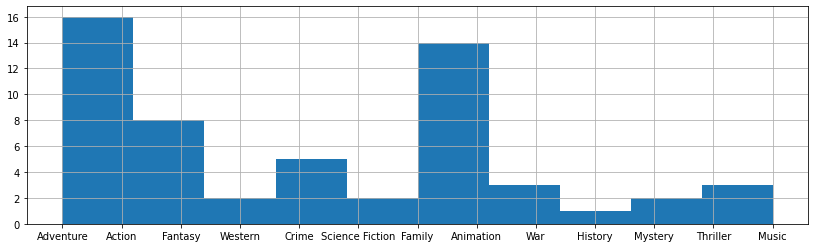

In [37]:
# Visualizing the number of times certain genres were the top popular
topGenreDF['Top_Genre'].hist(figsize=(14,4));

## Question 2: What kinds of propertiesare associated with movies that have high revenues?
  - Popularity
  - Voting
  - budget
  - genre
  - Months
  - runtime

#### Popularity Vs Revenue (Adjusted by the flactuation)

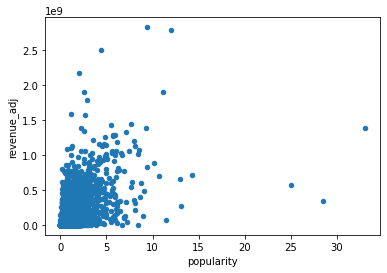

In [24]:
df_genreMix.plot(x='popularity', y='revenue_adj', kind='scatter');

> It appears popularity affects the revenues positively

#### Revenues Vs Votes

###### `vote average`

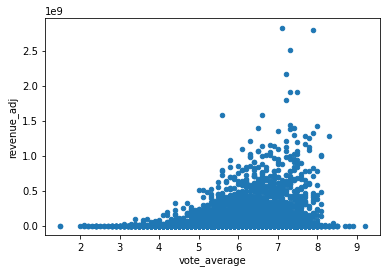

In [25]:
df_genreMix.plot(x='vote_average', y='revenue_adj', kind='scatter');

###### `vote count`

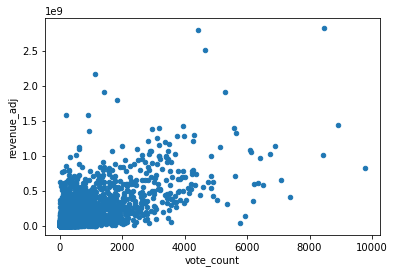

In [26]:
df_genreMix.plot(x='vote_count', y='revenue_adj', kind='scatter');

> It appears that Vote averages highly affects revenues, more than vote counts

#### Revenues Vs Budget

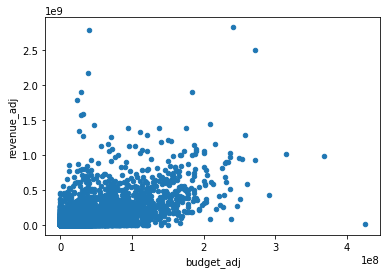

In [27]:
df_genreMix.plot(x='budget_adj', y='revenue_adj', kind='scatter');

> Budgets Correlates with revenue, However, there is many exceptions

#### Revenues Vs Genre

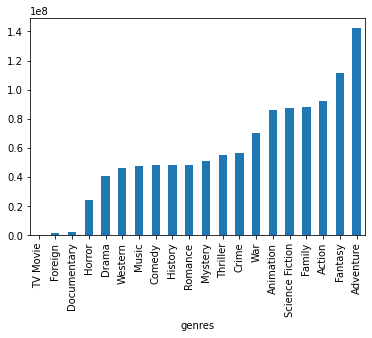

In [28]:
df_red.groupby('genres').revenue_adj.mean().sort_values().plot(kind='bar');

###### Top 5 Genres Historically got Mean Revenues

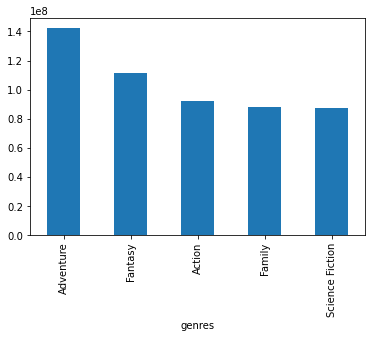

In [29]:
df_red.groupby('genres').revenue_adj.mean().nlargest(5, keep='all').plot(kind='bar');

#### Revenues In Different Months

In [30]:
# Changing Date fromat
df_genreMix['release_date'] = pd.to_datetime(df_genreMix['release_date'])
df_genreMix['months'] = df_genreMix['release_date'].apply(lambda x:x.strftime('%B'))
df_genreMix.head(1)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,months
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June


##### Highest adjusted Revenues made in Months Historically

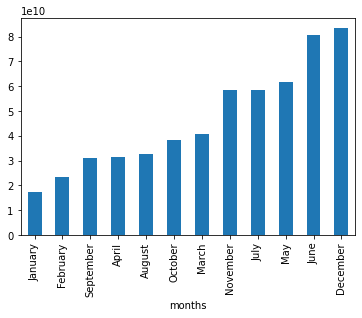

In [31]:
df_genreMix.groupby('months')['revenue_adj'].sum().sort_values().plot(kind='bar');

##### Number of Movies released each month
> The sum of revenues is a little bit tricky

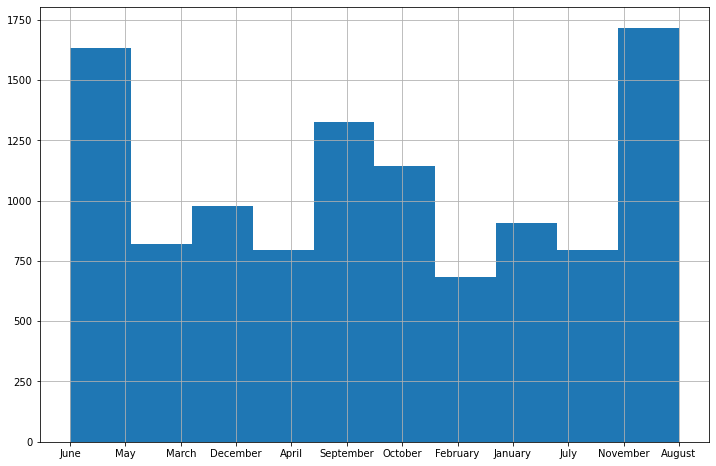

In [32]:
df_genreMix['months'].hist(figsize=(12,8));

##### Highest adjusted **`Mean`**Revenues made in Months Historically

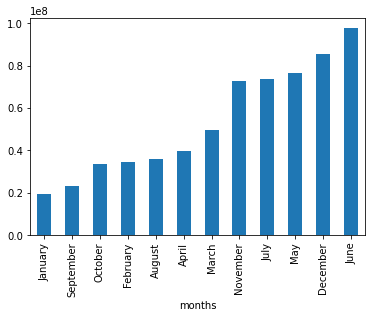

In [33]:
df_genreMix.groupby('months')['revenue_adj'].mean().sort_values().plot(kind='bar');

#### Revenues Vs Runtime

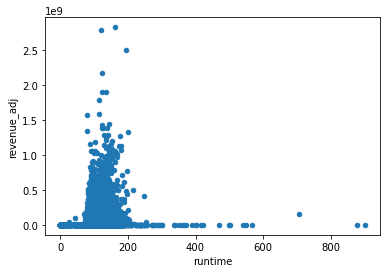

In [34]:
df_genreMix.plot(x='runtime', y='revenue_adj', kind='scatter');

> runtime correlates directly with revenues till around 150, then it correlates inversely with it

<a id='conclusions'></a>
## Conclusions

### Q1: Genres & Popularity:
- Adventure, Science Fiction, Fantasy, Action & Animation, are the most popular historically
- Popularity over all for movies are flactuating every year, but increasing on the long run
- The vote Count Affects popularity positively more than the Vote Average its self
- The Last 10 years, the top trending genres yearly:
    - Adventure (6), Fantasy (2), Action(1), Western(1)

### Q2: Properties affecting Revenues:
- **popularity** affects the revenues positively
- **Vote Average** affects the revenues dramatically, while vote count doesn't affect it that much
- **Budget** Correlates with revenue, However, there is many exceptions
- Top 5 **Genres** Historically got Mean Revenues:
    - Adventure, Fantasy, Action, Familly, Science Fiction
- Highest adjusted Revenues made Historically in these released **Months** :
`December` (1st), `June` (2nd)
- Highest adjusted *Mean* Revenues made Historically in these released **Months** : 
`June` (1st) , `December` (2nd)
> It appears more movie are released in December (christmas season) than in June (Summer) 
- **runtime** correlates directly with revenues till around 150, then it correlates inversely with it